In [2]:
# 라이브러리 임포트
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [3]:
# Iris 데이터 (Iris.csv) 불러오기
x_df = pd.read_csv('dataset/Iris.csv')
x_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Iris 데이터 
x = x_df.iloc[:, 1:5].values

In [20]:
# 파라미터 설정
num_clusters = 2
n_instances, n_dim = x.shape

In [21]:
# 계층적 군집화 알고리즘 (Agglomerative - Ward) 실행 
ward = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward').fit(x)
# ward.labels_

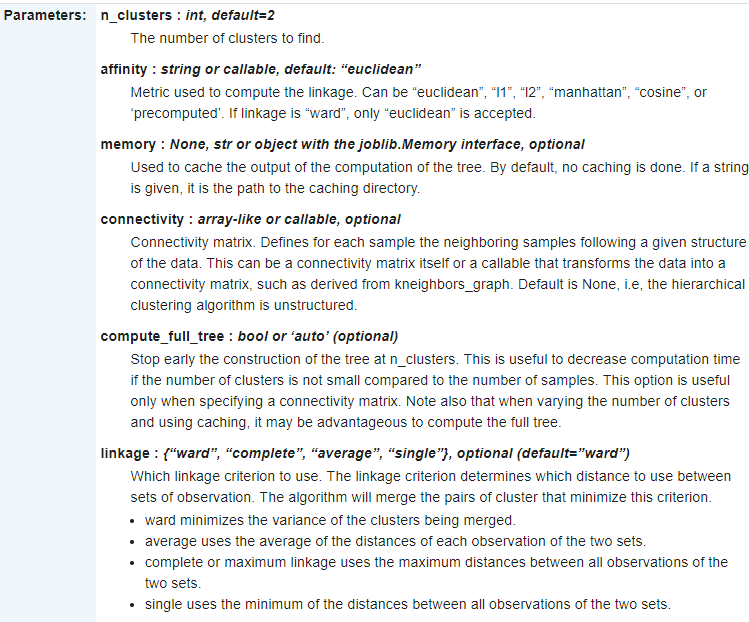

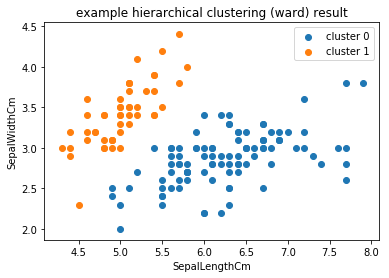

In [22]:
# 계층적 군집화 결과 plotting
unique_labels = np.unique(ward.labels_)

for i in unique_labels:
    cluster_member_mask = (ward.labels_ == i)
    
    x_cluster_i = x[cluster_member_mask, :]
    
    plt.scatter(x_cluster_i[:, 0], x_cluster_i[:, 1], label='cluster ' + str(i))

plt.title('example hierarchical clustering (ward) result')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.show()

In [23]:
# 군집 중심 좌표 계산
C = np.zeros([num_clusters, n_dim])
for i in np.unique(ward.labels_):
    C[i, :] = np.mean(x[ward.labels_==i, :], axis=0)
C

array([[6.262, 2.872, 4.906, 1.676],
       [5.006, 3.418, 1.464, 0.244]])

In [ ]:
""" 계층적 군집화에서 덴드로그램을 이용한 군집 수 결정 """

In [24]:
# 덴드로그램 작성을 위한 linkage matrix 계산
from scipy.cluster.hierarchy import linkage
Z = linkage(x, 'ward')

metric: euclidean, minkowski, cosine, jaccard, mahalanobis...
(check metrics in scipy.spatial.distance.pdist)

In [25]:
# 덴드로그램 작성
def plot_dendrogram(link_mat, n_clusters, mode=None, truncate_p=100):
    plt.figure()
    plt.title('Hierarchical Clustering (Ward) Dendrogram')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(
        link_mat,
        color_threshold = Z[1-n_clusters, 2],
        truncate_mode = mode,
        p = truncate_p
    )
    plt.show()

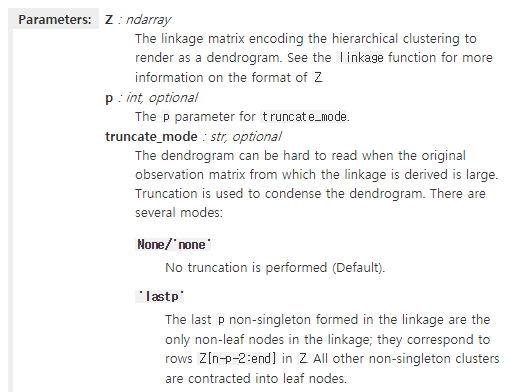

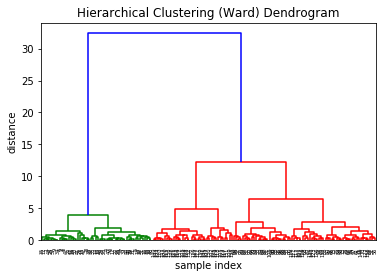

In [26]:
# 덴드로그램 (last 100 aggregation step) 작성
plot_dendrogram(Z, num_clusters)

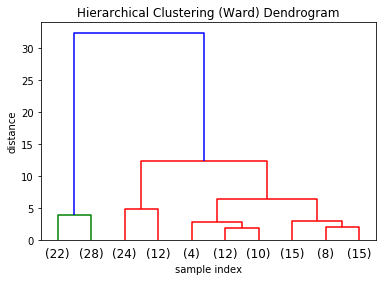

In [27]:
# 덴드로그램 (last 10 step) 작성
plot_dendrogram(Z, num_clusters, mode='lastp', truncate_p=10)

In [28]:
# 파라미터 설정
num_clusters = 3
n_instances, n_dim = x.shape

In [29]:
# 계층적 군집화 알고리즘 (Agglomerative - Ward) 실행 
ward = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward').fit(x)
# ward.labels_

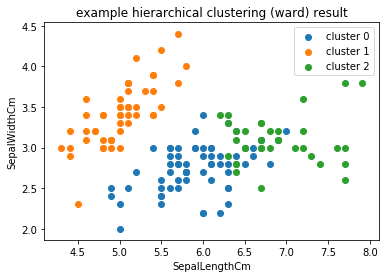

In [30]:
# 계층적 군집화 결과 plotting
unique_labels = np.unique(ward.labels_)

for i in np.unique(ward.labels_):
    cluster_member_mask = (ward.labels_ == i)
    
    x_cluster_i = x[cluster_member_mask, :]
    
    plt.scatter(x_cluster_i[:, 0], x_cluster_i[:, 1], label='cluster ' + str(i))

plt.title('example hierarchical clustering (ward) result')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.show()

In [31]:
# 군집 중심 좌표 계산
C = np.zeros([num_clusters, n_dim])
for i in np.unique(ward.labels_):
    C[i, :] = np.mean(x[ward.labels_==i, :], axis=0)
C

array([[5.9203125 , 2.7515625 , 4.4203125 , 1.434375  ],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.86944444, 3.08611111, 5.76944444, 2.10555556]])

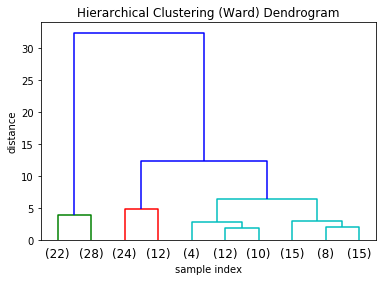

In [32]:
# 덴드로그램 (last 10 step) 작성
plot_dendrogram(Z, num_clusters, mode='lastp', truncate_p=10)